In [74]:
import numpy as np
from numpy import sin,cos,pi,exp,sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.fft
from scipy import signal

# Question-1

## 1(a)

In [90]:
t=np.linspace(0,1,200)
x_t=9*sin(2*5*pi*t)+7*sin(2*15*pi*t)+5*sin(2*25*pi*t)+3*sin(2*50*pi*t)

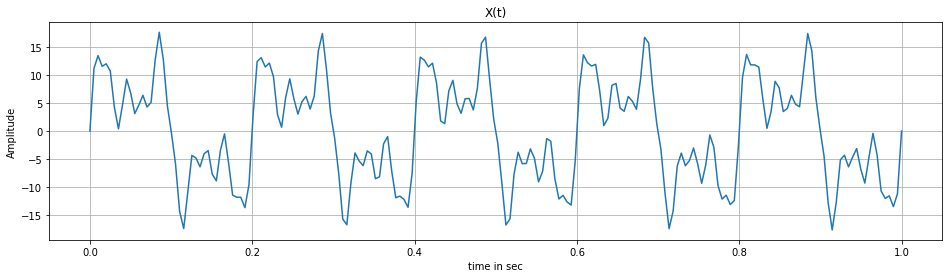

In [91]:
plt.figure(figsize=(16,4))
plt.plot(t,x_t)
plt.title('X(t)')
plt.xlabel('time in sec')
plt.ylabel('Amplitude')
plt.grid()

## 1(b)

In [92]:
def DFT(x):
    N = len(x)
    out = []
    for k in range(N):
        dft = 0
        for n in range(N):
            dft+=(x[n]*np.exp(-2j*np.pi*k*n/N))
        out.append(dft)
    return out

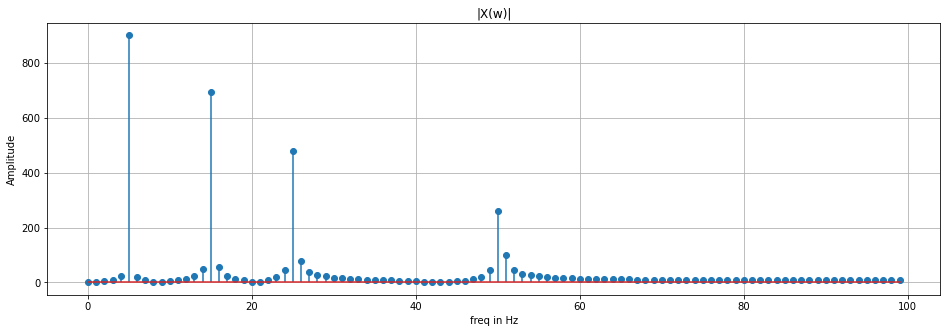

In [93]:
N=len(x_t)
X_k = DFT(x_t)[0:100]
k = np.arange(N/2)

plt.figure(figsize=(16,5))
plt.stem(k,np.absolute(X_k))
plt.title('|X(w)|')
plt.xlabel('freq in Hz')
plt.ylabel('Amplitude')
plt.grid()

## 1(c)

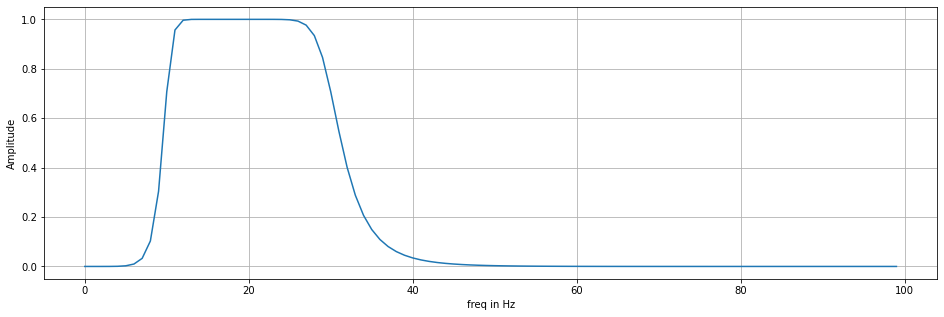

In [94]:
b, a = signal.butter(6,[10,30] , 'bp', fs=200)
w, h = signal.freqz(b, a, worN=100)

plt.figure(figsize=(16,5))
plt.plot(np.abs(h))
plt.xlabel('freq in Hz')
plt.ylabel('Amplitude')
plt.grid()


## 1(d)

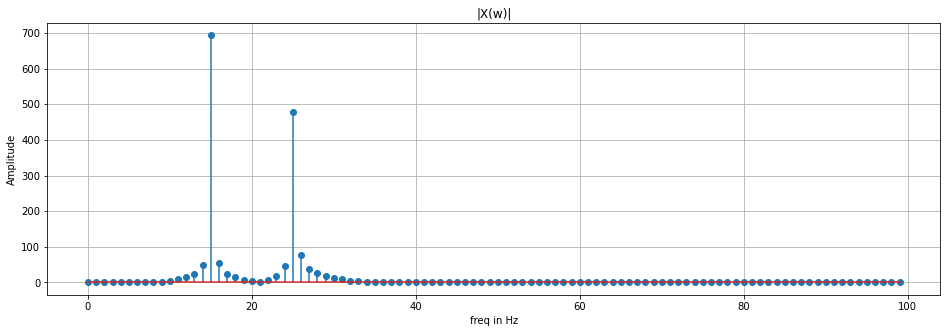

In [95]:
filtered_spectrum = X_k*h

plt.figure(figsize=(16,5))
plt.stem(k,np.absolute(filtered_spectrum))
plt.title('|X(w)|')
plt.xlabel('freq in Hz')
plt.ylabel('Amplitude')
plt.grid()

## 1(e)

C:\Users\theas\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


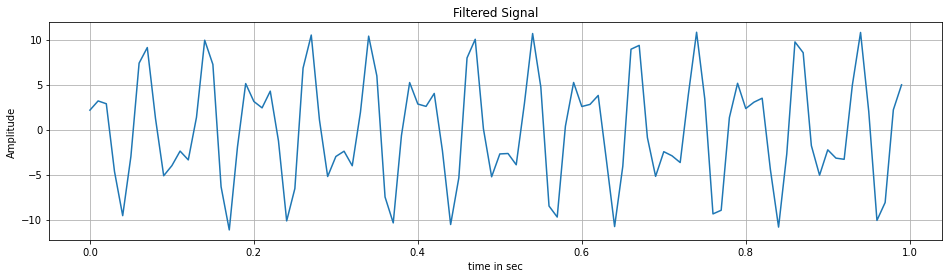

In [96]:
def IDFT(X):
    N = len(X)
    x = []
    for n in range(N):
        xn = 0
        for k in range(N):
            xn += X[k]*np.exp(2j*np.pi*k*n/N)/N
        x.append(xn)
    return x
        
xn = IDFT(filtered_spectrum)

t = np.arange(0,1,1/100)

plt.figure(figsize=(16,4))
plt.title('Filtered Signal')
plt.xlabel('time in sec')
plt.ylabel('Amplitude')
plt.plot(t,xn)
plt.grid()

# Question-3

## 3(a)

In [9]:
numerator = [-0.2,0.18,0.4,1]
denominator=[1,0.4,0.18,-0.2]
print("Poles=",np.roots(denominator))
print("Zeros=",np.roots(numerator))

Poles= [-0.4+0.58309519j -0.4-0.58309519j  0.4+0.j        ]
Zeros= [ 2.5+0.j         -0.8+1.16619038j -0.8-1.16619038j]


### The given Filter is All pass filter

### Poles(p) and Zeros(z) follows Z=1/P* relationship.

## 3(b)

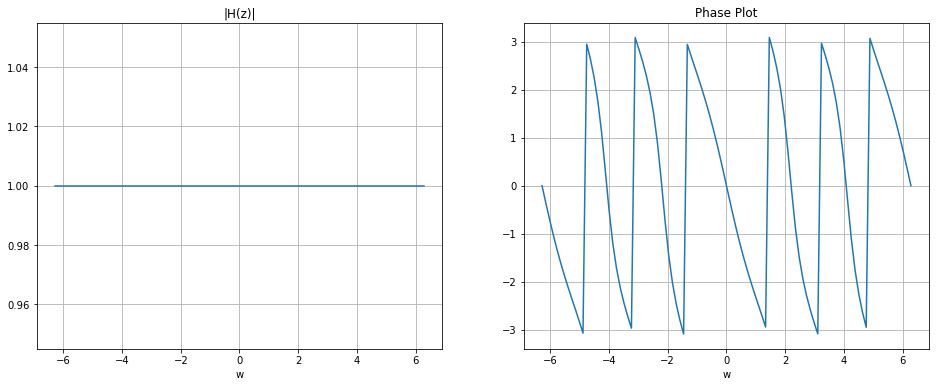

In [10]:
w=np.linspace(-2*np.pi,2*np.pi,100)
z=np.exp(1j*w)
num=(-0.2*(z**3))+(0.18*(z**2))+(0.4*z)+1
den=(z**3)+(0.4*(z**2))+(0.18*z)-0.2
H=num/den
fig, axis=plt.subplots(1,2,figsize=(16,6))        
axis[0].plot(w,np.abs(H))
axis[0].set_title('|H(z)|')
axis[0].set_xlabel("w")
axis[0].grid()
axis[1].plot(w,np.angle(H))
axis[1].set_title('Phase Plot')
axis[1].set_xlabel("w")
axis[1].grid()

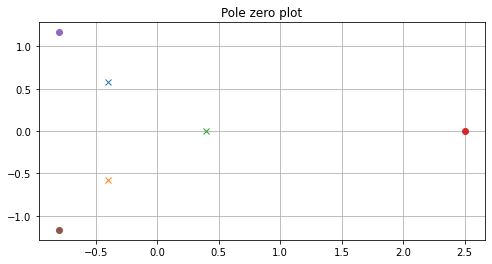

In [66]:
poles = np.roots(denominator)
zeros = np.roots(numerator)

plt.figure(figsize=(8,4))
for p in poles:
    plt.plot(np.real(p),np.imag(p),marker='x',label='Poles')
for z in zeros:
    plt.plot(np.real(z),np.imag(z),marker='o',label='zeros')
plt.title("Pole zero plot")
plt.grid()

# Question-4

[1.00000205+3.55693933e-06j 1.00000205-3.55693933e-06j
 0.99999589+0.00000000e+00j]
[-0.00232899+0.77640918j -0.00232899-0.77640918j -0.33853523+0.j        ]


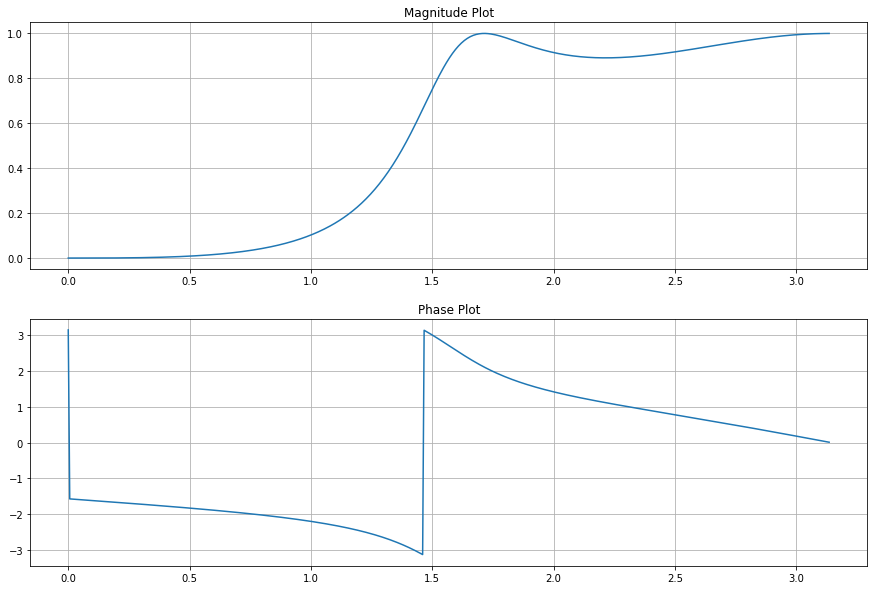

In [87]:
n,d = signal.cheby1(N=3,rp = 1,Wn = [2000], btype = 'highpass', output = 'ba', fs = 8000)
zeros = np.roots(n)
poles = np.roots(d)
print(zeros)
print(poles)
w, z = signal.freqz(n,d)

fig,axis = plt.subplots(2,1,figsize = (15,10))
axis[0].plot(w, abs(z))
axis[0].set_title('Magnitude Plot')
axis[0].grid()

axis[1].plot(w, np.angle(z))
axis[1].set_title('Phase Plot')
axis[1].grid()

# Question-5

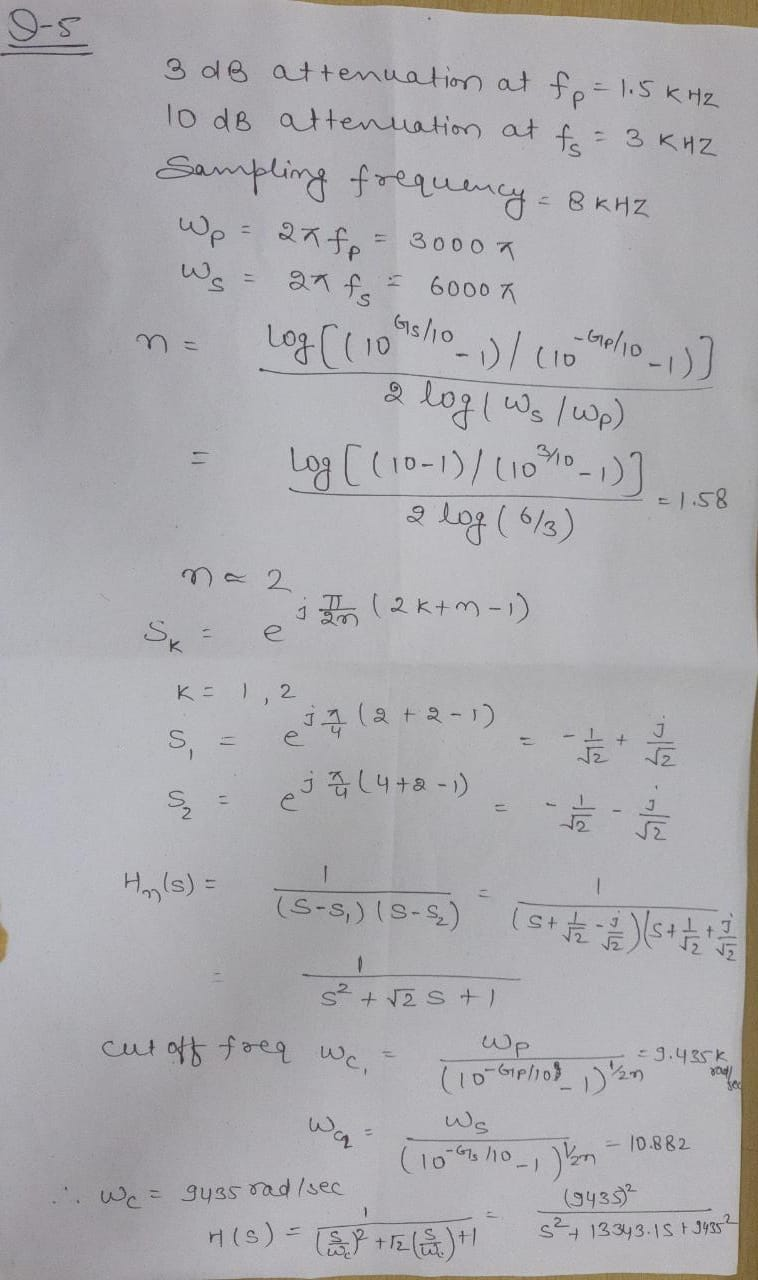

<Figure size 1080x504 with 0 Axes>

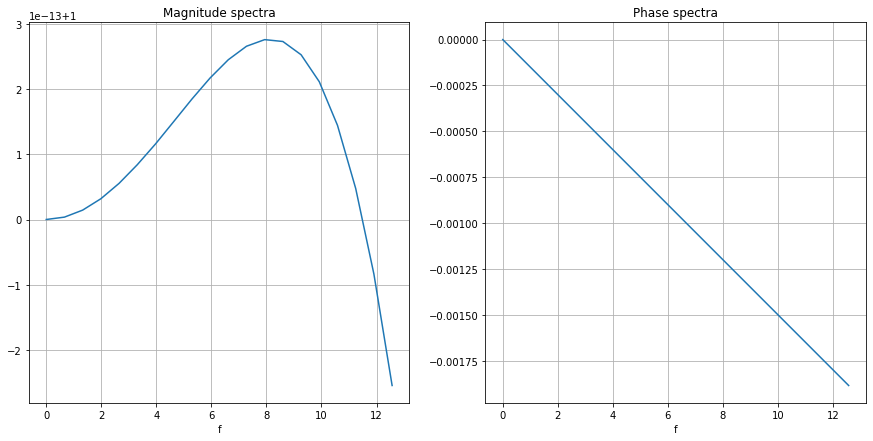

In [88]:
w=np.linspace(0,4*np.pi,20)
s=1j*w
h=(9435**2)/((s**2)+(13343.1*s)+(9435**2))
plt.figure(figsize=(15,7))
fig, ax=plt.subplots(1,2,figsize=(15,7)) 
ax[0].plot(w,np.abs(h))
ax[0].set_title('Magnitude spectra')
ax[0].set_xlabel("f")
ax[0].grid()
ax[1].plot(w,np.angle(h))
ax[1].set_title('Phase spectra')
ax[1].set_xlabel("f")
ax[1].grid()

# Question-6

## 6(a)

In [42]:
import time
t1=time.time()
N=1024
x=np.random.rand(N)

def DFT(x):
    N = len(x)
    out = []
    for k in range(N):
        dft = 0
        for n in range(N):
            dft+=(x[n]*np.exp(-2j*np.pi*k*n/N))
        out.append(dft)
    return out
t2=time.time()
t=t2-t1
print("Operations required:")
print("Complex multiplication=",N**2)
print("Complex Addition      =",N*(N-1))
print("Time taken by the code to run  =",t,"sec")


Operations required:
Complex multiplication= 1048576
Complex Addition      = 1047552
Time taken by the code to run  = 0.000997304916381836 sec


## 6(b)

In [44]:
t1=time.time()
dft=np.fft.fft(x)
t2=time.time()
t=t2-t1
print("Run time of code=",t,"sec")

Run time of code= 0.0009975433349609375 sec


## 6(c)

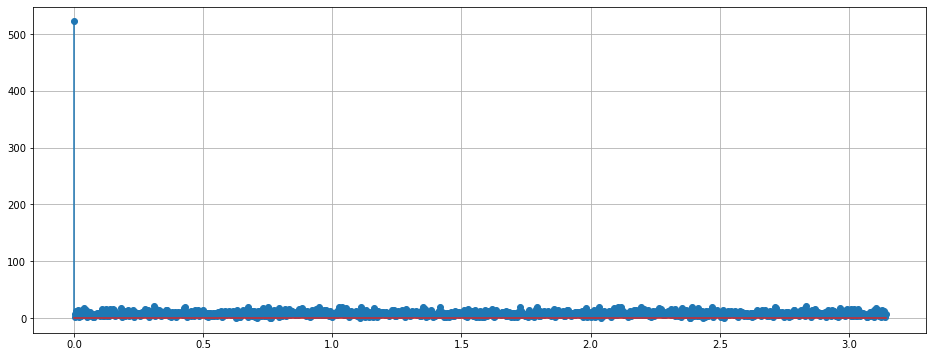

In [13]:
w=np.linspace(0,pi,N)
plt.figure(figsize=(16,6))
plt.stem(w,np.abs(DFT(x)))
plt.grid()

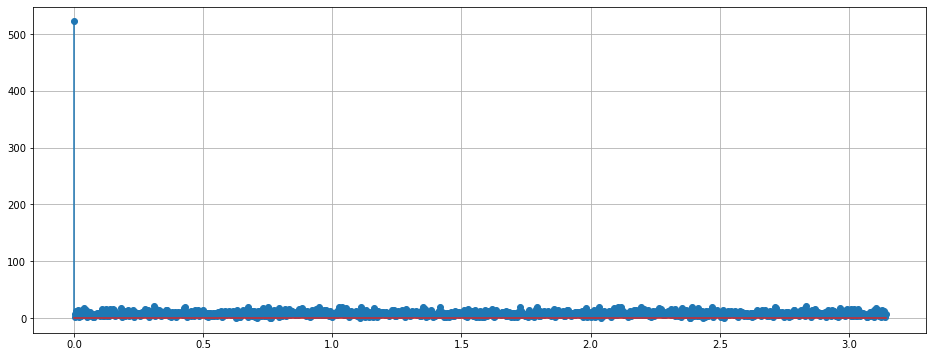

In [14]:
plt.figure(figsize=(16,6))
plt.stem(w,np.abs(np.fft.fft(x)))
plt.grid()

### Conclusion: 
                 By applying DFT function and inbuilt FFT function i am getting same output but time taken by inbuilt FFT             function is very less

## 6(d)

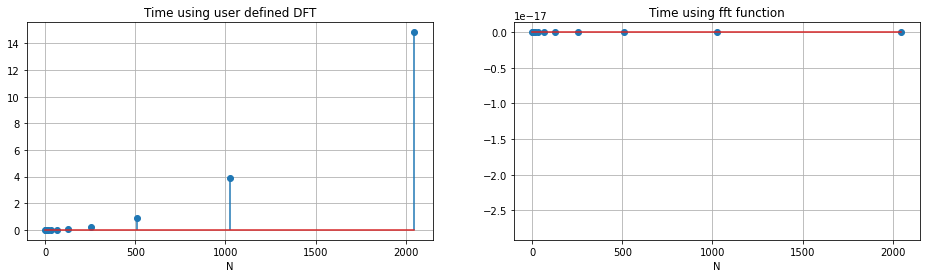

In [19]:
samples = [2**i for i in range(0,12)]
time_a = []
time_b = []

for N in samples:
    x = np.random.rand(N)
    
    t1a = time.time()
    dft_a = DFT(x)
    t2a = time.time()
    run_time_a = t2a - t1a
    time_a.append(run_time_a)
    
    t1b = time.time()
    dft_b = np.fft.fft(x)
    t2b = time.time()
    run_time_b = t2b - t1b
    time_b.append(run_time_b)
    
fig, ax=plt.subplots(1,2,figsize=(16,4))

ax[0].stem(samples,time_a)
ax[0].set_title('Time using user defined DFT')
ax[0].set_xlabel("N")
ax[0].grid()

ax[1].stem(samples,time_b)
ax[1].set_title('Time using fft function')
ax[1].set_xlabel("N")
ax[1].grid()

# Question-7

Time to calculate  0.000997781753540039  secs


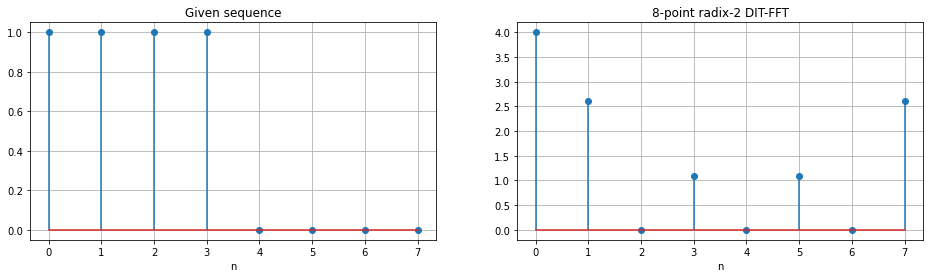

In [33]:
t1 = time.time()

x = [1,1,1,1,0,0,0,0]
w8 = np.exp(-1j*2*np.pi/8)

x_stage1 = np.zeros(8,dtype=complex)

x_stage1[0] = x[0] + x[4]
x_stage1[1] = x[0] - x[4]
x_stage1[2] = x[2] + x[6]
x_stage1[3] = x[2] - x[6]
x_stage1[4] = x[1] + x[5]
x_stage1[5] = x[1] - x[5]
x_stage1[6] = x[3] + x[7]
x_stage1[7] = x[3] - x[7]



x_stage2 = np.zeros(8,dtype=complex)

x_stage2[0] = x_stage1[0] + (w8**0)*x_stage1[2]
x_stage2[1] = x_stage1[1] + (w8**2)*x_stage1[3]
x_stage2[2] = x_stage1[0] - (w8**0)*x_stage1[2]
x_stage2[3] = x_stage1[1] - (w8**2)*x_stage1[3]
x_stage2[4] = x_stage1[4] + (w8**0)*x_stage1[6]
x_stage2[5] = x_stage1[5] + (w8**2)*x_stage1[7]
x_stage2[6] = x_stage1[4] - (w8**0)*x_stage1[6]
x_stage2[7] = x_stage1[5] - (w8**2)*x_stage1[7]

X = np.zeros(8,dtype=complex)

X[0] = x_stage2[0] + (w8**0)*x_stage2[4]
X[1] = x_stage2[1] + (w8**1)*x_stage2[5]
X[2] = x_stage2[2] + (w8**2)*x_stage2[6]
X[3] = x_stage2[3] + (w8**3)*x_stage2[7]
X[4] = x_stage2[0] - (w8**0)*x_stage2[4]
X[5] = x_stage2[1] - (w8**1)*x_stage2[5]
X[6] = x_stage2[2] - (w8**2)*x_stage2[6]
X[7] = x_stage2[3] - (w8**3)*x_stage2[7]


t2 = time.time()
print("Time to calculate ",t2-t1," secs")

n = np.arange(8)
fig, ax=plt.subplots(1,2,figsize=(16,4))

ax[0].stem(n,x)
ax[0].set_title('Given sequence')
ax[0].set_xlabel("n")
ax[0].grid()

ax[1].stem(n,np.absolute(X))
ax[1].set_title('8-point radix-2 DIT-FFT')
ax[1].set_xlabel("n")
ax[1].grid()

# Question-8

Time to calculate  0.0010340213775634766  secs


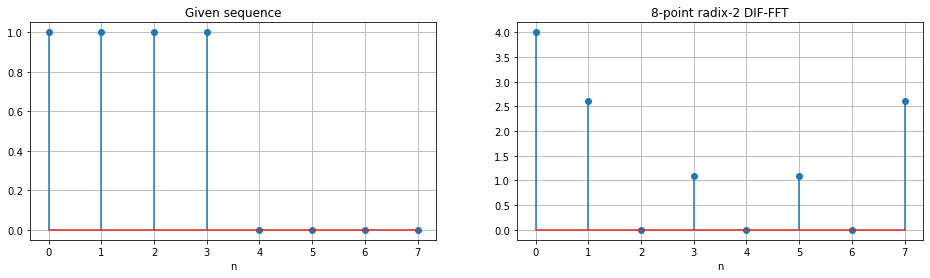

In [47]:
t1_8 = time.time()

x = [1,1,1,1,0,0,0,0]
w = np.exp(-1j*2*np.pi/8)

x1 = np.zeros(8,dtype=complex)

x_stage1[0] = x[0] + x[4]
x_stage1[1] = x[1] + x[5]
x_stage1[2] = x[2] + x[6]
x_stage1[3] = x[3] + x[7]
x_stage1[4] = (x[0] - x[4])*(w**0)
x_stage1[5] = (x[1] - x[5])*(w**1)
x_stage1[6] = (x[2] - x[6])*(w**2)
x_stage1[7] = (x[3] - x[7])*(w**3)


x_stage2 = np.zeros(8,dtype=complex)

x_stage2[0] = x_stage1[0] + x_stage1[2]
x_stage2[1] = x_stage1[1] + x_stage1[3]
x_stage2[2] = (x_stage1[0] - x_stage1[2])*(w**0)
x_stage2[3] = (x_stage1[1] - x_stage1[3])*(w**2)
x_stage2[4] = x_stage1[4] + x_stage1[6]
x_stage2[5] = x_stage1[5] + x_stage1[7]
x_stage2[6] = (x_stage1[4] - x_stage1[6])*(w**0)
x_stage2[7] = (x_stage1[5] - x_stage1[7])*(w**2)


X = np.zeros(8,dtype=complex)

X[0] = x_stage2[0] + x_stage2[1]
X[4] = x_stage2[0] - x_stage2[1]
X[2] = x_stage2[2] + x_stage2[3]
X[6] = x_stage2[2] - x_stage2[3]
X[1] = x_stage2[4] + x_stage2[5]
X[5] = x_stage2[4] - x_stage2[5]
X[3] = x_stage2[6] + x_stage2[7]
X[7] = x_stage2[6] - x_stage2[7]

t2_8 = time.time()
print("Time to calculate ",t2_8-t1_8," secs")


n = np.arange(8)
fig, ax=plt.subplots(1,2,figsize=(16,4))

ax[0].stem(n,x)
ax[0].set_title('Given sequence')
ax[0].set_xlabel("n")
ax[0].grid()

ax[1].stem(n,np.absolute(X))
ax[1].set_title('8-point radix-2 DIF-FFT')
ax[1].set_xlabel("n")
ax[1].grid()

# Question-9

## 9(a)

In [20]:
l = [1,2,3,1]
h=[1,1,1,0]
L=len(l)+len(h)-1
def linear_con(p,q):                                         
    q_new=np.pad(q,(0,L-len(q)))
    sum=np.zeros(L)
    for i in range(len(p)):
        sum=sum+p[i]*q_new
        q_new=np.roll(q_new,1)
    return sum  
print("Linear convolution:",linear_con(l,h))

Linear convolution: [1. 3. 6. 6. 4. 1. 0.]


## 9(b)

In [21]:
def rotate(l, n):
     return l[n:] + l[:n]
N=len(l)
W=np.zeros((N,N))
for i in range(N):
    W[:,i]=rotate(l,N-i) 
CC= np.dot(W,h)
print("Circular convolution:",CC)

Circular convolution: [5. 4. 6. 6.]
